## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)

## Utility functions

In [2]:
def sigmoid(x):
  return 1. / (1 + np.exp(-x))

def predict(x, w, b):
  return sigmoid(np.dot(w, x) + b)

def cce(y_predict, y):
  m = y.shape[1]
  loss = -1 * (y * np.log(y_predict) + (1 - y) * np.log(1 - y_predict))
  cost = (1 / m) * np.sum(loss)
  return loss, cost

def mse(y_predict, y):
  m = y.shape[1]
  loss = 1/2 * (y_predict - y)**2
  cost = (1 / m) * np.sum(loss)
  return loss, cost

def compute_accuracy(y_predict, y):
  return 100 - np.mean(np.abs(y_predict - y)) * 100

## Perceptron (Batch Gradient Descent)

In [3]:
def perceptron(x, y, learning_rate, iterations, iter_log):
  # Get dimensional
  feat, m = x.shape

  # Init parameters
  # In 1 layer NN initializing parameters to 0 or random doesn't matter
  w = np.random.randn(1, feat) * 0.01
  b = np.random.randn() * 0.01
  costs = []
  accuracies = []

  # Batch Gradient Descent
  for i in range(iterations):
    # Forward propagation
    y_predict = predict(x, w, b)

    # Cost and Accuracy
    difference = y_predict - y
    loss, cost = cce(y_predict, y)
    costs.append(cost)
    accuracy = compute_accuracy(y_predict, y)
    accuracies.append(accuracy)

    # Backward propagation
    dw = difference * x
    db = difference
    dW = (1 / m) * np.sum(dw, axis=1)
    dB = (1 / m) * np.sum(db, axis=1)

    # Update parameters
    w -= learning_rate * dW
    b -= learning_rate * dB

    # Print cost and accuracy
    if (not iter_log == 0) and (i % iter_log == 0 or i == iterations - 1):
      print('Iteration:', i, '  cost:', cost, ' accuracy:', accuracy)

  report = {
      'costs': costs,
      'accuracies': accuracies
  }

  return w, b, report

## Dataset

In [4]:
# Loading and preprocessing data
x1, x2, y = np.loadtxt("data.txt", delimiter = ",", unpack=True)
N_TRAIN = y.shape[0]

x = np.concatenate((x1.reshape(1, N_TRAIN), x2.reshape(1, N_TRAIN)), axis=0)
y_train = y.reshape(1, N_TRAIN)

# Normalize and Standardize data
x_train = x - np.mean(x, axis=1, keepdims=True)
x_train /= np.std(x_train, axis=1, keepdims=True)

## Training

In [5]:
LEARNING_RATE = 0.1
N_EPOCH = 2000
REPORT_MOD = 100

w, b, report = perceptron(x_train, y_train, LEARNING_RATE, N_EPOCH, REPORT_MOD)
y_predict = predict(x_train, w, b)
print("w: ", w)
print("b: ", b)

Iteration: 0   cost: 0.6997386323358503  accuracy: 49.67247287024825
Iteration: 100   cost: 0.3293826347925193  accuracy: 74.41222068955283
Iteration: 200   cost: 0.28453972086161355  accuracy: 78.54778988687043
Iteration: 300   cost: 0.26731348196643545  accuracy: 80.34406593742705
Iteration: 400   cost: 0.2583970165500285  accuracy: 81.38075353977132
Iteration: 500   cost: 0.25308964091601355  accuracy: 82.06551820535782
Iteration: 600   cost: 0.24966168417320977  accuracy: 82.55496850926953
Iteration: 700   cost: 0.24732558397132554  accuracy: 82.92337004643952
Iteration: 800   cost: 0.2456720480640157  accuracy: 83.21093285250768
Iteration: 900   cost: 0.24446820914466416  accuracy: 83.44151884736732
Iteration: 1000   cost: 0.24357254123172753  accuracy: 83.6302758630361
Iteration: 1100   cost: 0.24289460549305741  accuracy: 83.78733046212385
Iteration: 1200   cost: 0.24237428771288042  accuracy: 83.91973575102769
Iteration: 1300   cost: 0.2419703447807143  accuracy: 84.03257063327

## Results

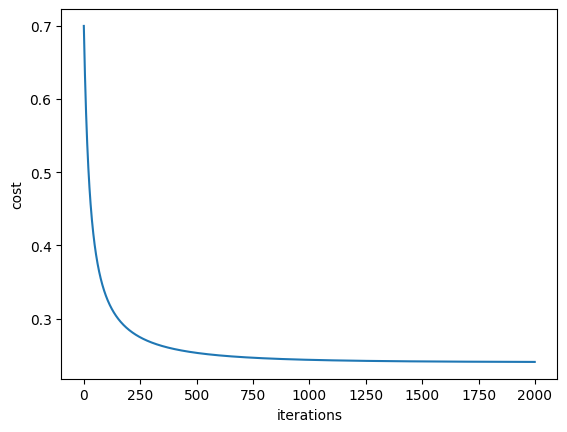

In [6]:
# Cost plot

plt.plot(report['costs'])
plt.ylabel('cost')
plt.xlabel('iterations')
plt.show()

C:\Users\alise\AppData\Local\Temp\ipykernel_8352\1297355587.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


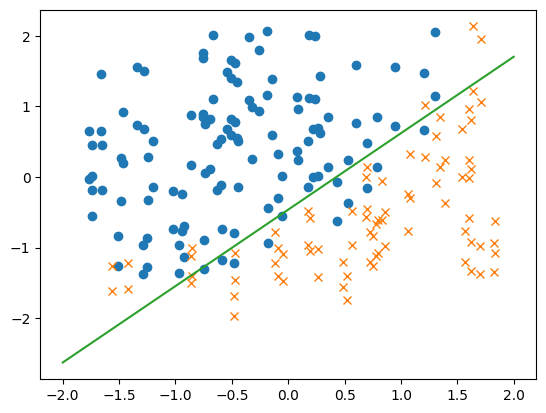

In [7]:
# Learned function plot

fig, ax = plt.subplots()

o_points = x_train.T[y_train.T[:, 0] == 1]
x_points = x_train.T[y_train.T[:, 0] == 0]

ax.plot(o_points[:, 0], o_points[:, 1], 'o')
ax.plot(x_points[:, 0], x_points[:, 1], 'x')

x =  np.arange(-2, 3)
ax.plot(x, ((b + w[0][0] * x) / (-w[0][1])))

fig.show()